# Food Delivery Data Analysis Hackathon


#Step 1 Loading the Data

In [58]:
#Installing Important libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
#Load CSV Data 
df_orders=pd.read_csv("D:/Internship/orders.csv")
df_orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [6]:
#Load the Json File(users.json)
df_users=pd.read_json("D:/Internship/users.json")
df_users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [10]:
#Load sql file(restaurants.sql)
connection=sqlite3.connect(":memory:")

with open("restaurants.sql") as file:
    restaurant_sql=file.read()
connection.executescript(restaurant_sql)

df_restaurants=pd.read_sql_query("select * from restaurants",connection)

df_restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [12]:
#Loading all the tables in sqlite to merge the table using sql 
df_orders.to_sql("orders",connection,index=False, if_exists="replace")
df_users.to_sql("users",connection,index=False, if_exists="replace")
df_restaurants.to_sql("restaurants",connection,index=False, if_exists="replace")

500

In [172]:
#Create a final_output_df including important columns from tables while merging using left join 
final_output_df = pd.read_sql_query(
    """
    SELECT
        o.order_id,
        o.order_date,
        o.total_amount,
        o.user_id,
        u.city,
        u.membership,
        o.restaurant_id,
        o.restaurant_name,
        r.cuisine,
        r.rating
    FROM orders o
    LEFT JOIN users u
        ON o.user_id = u.user_id
    LEFT JOIN restaurants r
        ON o.restaurant_id = r.restaurant_id
    """,
    connection
)


In [173]:
#saving the final_ouput_df as final_food_delivery_dataset
final_output_df.to_csv("D:/Internship/final_food_delivery_dataset.csv",index=False)

In [174]:
#Load the final ouptut file 
final_df=pd.read_csv("D:/Internship/final_food_delivery_dataset.csv")


In [175]:
final_df.head()


,order_id,order_date,total_amount,user_id,city,membership,restaurant_id,restaurant_name,cuisine,rating
0,1,18-02-2023,842.97,2508,Hyderabad,Regular,450,New Foods Chinese,Mexican,3.2
1,2,18-01-2023,546.68,2693,Pune,Regular,309,Ruchi Curry House Multicuisine,Indian,4.5
2,3,15-07-2023,163.93,2084,Chennai,Gold,107,Spice Kitchen Punjabi,Mexican,4.0
3,4,04-10-2023,1155.97,319,Bangalore,Gold,224,Darbar Kitchen Non-Veg,Chinese,4.8
4,5,25-12-2023,1321.91,1064,Pune,Regular,293,Royal Eatery South Indian,Italian,3.0


#step 2: Data Cleaning

In [177]:
final_df.shape

(10000, 10)

In [32]:
final_df.info()  #To check the information of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   order_date       10000 non-null  object 
 2   total_amount     10000 non-null  float64
 3   user_id          10000 non-null  int64  
 4   city             10000 non-null  object 
 5   membership       10000 non-null  object 
 6   restaurant_id    10000 non-null  int64  
 7   restaurant_name  10000 non-null  object 
 8   cuisine          10000 non-null  object 
 9   rating           10000 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [178]:
final_df.describe()

,order_id,total_amount,user_id,restaurant_id,rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,801.162412,1504.117700,251.016700,4.045430
std,2886.89568,405.458753,861.727776,144.622558,0.606531
min,1.00000,100.200000,1.000000,1.000000,3.000000
25%,2500.75000,446.310000,761.000000,127.000000,3.500000
50%,5000.50000,806.295000,1508.000000,251.000000,4.100000
75%,7500.25000,1149.227500,2250.250000,376.000000,4.600000
max,10000.00000,1499.830000,3000.000000,500.000000,5.000000


In [179]:
final_df.isnull().sum()  #To check if null value is present or not

order_id           0
order_date         0
total_amount       0
user_id            0
city               0
membership         0
restaurant_id      0
restaurant_name    0
cuisine            0
rating             0
dtype: int64

In [180]:
final_df.duplicated().sum()  #To check if there are duplicates record or not

0

In [181]:
#Converted Date format for time analysis 
final_df['order_date']=pd.to_datetime(final_df['order_date'])

C:\Users\acer\AppData\Local\Temp\ipykernel_10904\1291577342.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date']=pd.to_datetime(final_df['order_date'])


Before Performing EDA, I completed the data cleaning by checking for missing values and duplicated values. I also converted the order date column into datetime format and also ensured that other columns had the correct data types.

#Step3: Task wise Analysis

In [182]:
# Order trends over time
#Extracting the month and year
final_df['month']=final_df['order_date'].dt.to_period("M")
final_df.head()

,order_id,order_date,total_amount,user_id,city,membership,restaurant_id,restaurant_name,cuisine,rating,month
0,1,2023-02-18,842.97,2508,Hyderabad,Regular,450,New Foods Chinese,Mexican,3.2,2023-02
1,2,2023-01-18,546.68,2693,Pune,Regular,309,Ruchi Curry House Multicuisine,Indian,4.5,2023-01
2,3,2023-07-15,163.93,2084,Chennai,Gold,107,Spice Kitchen Punjabi,Mexican,4.0,2023-07
3,4,2023-10-04,1155.97,319,Bangalore,Gold,224,Darbar Kitchen Non-Veg,Chinese,4.8,2023-10
4,5,2023-12-25,1321.91,1064,Pune,Regular,293,Royal Eatery South Indian,Italian,3.0,2023-12


In [183]:
monthly_order=final_df.groupby('month')['order_id'].count().reset_index(name="Total Orders")
monthly_order

,month,Total Orders
0,2023-01,804
1,2023-02,785
2,2023-03,903
3,2023-04,812
4,2023-05,844
5,2023-06,784
6,2023-07,859
7,2023-08,851
8,2023-09,812
9,2023-10,863


<Figure size 800x600 with 0 Axes>

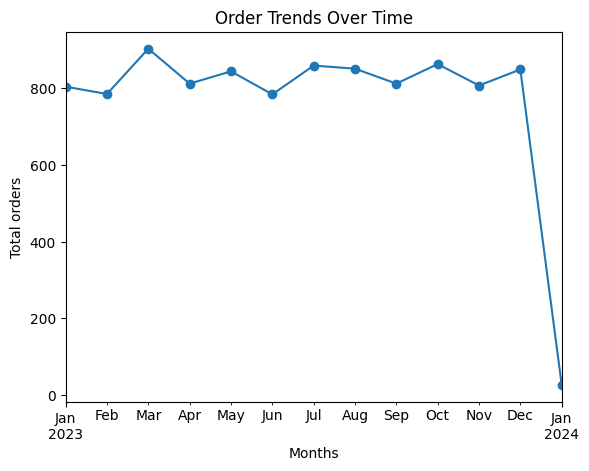

In [184]:
#PLot the graph
plt.figure(figsize=(8,6))
monthly_order.plot(
    kind='line',
    x='month',
    y='Total Orders',
    marker='o',
    legend=False
)
plt.title("Order Trends Over Time")
plt.xlabel("Months")
plt.ylabel("Total orders")
plt.show()
    

To complete the first task , I grouped the orders by month and calculate the total numbers of orders in each month . This help me to identity overall trends and pattrn in customer order behavior. I also plot the line graph for visual analysis

In [185]:
# User behavior patterns
user_behavior=final_df.groupby(['user_id','membership','city']).agg(
    total_orders=('order_id','count'),
    total_amount_spent=('total_amount','sum')
).reset_index()

user_behavior.head()

,user_id,membership,city,total_orders,total_amount_spent
0,1,Regular,Chennai,1,1289.66
1,2,Gold,Pune,10,7564.12
2,3,Gold,Bangalore,2,1839.51
3,4,Regular,Bangalore,4,3741.16
4,5,Gold,Pune,5,5742.88


For this task, I group by user ID to count total number of order and to calulate their spending

In [186]:
# City-wise and cuisine-wise performance

#City-Wise Performance
city_wise_performance=final_df.groupby('city').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum')
).reset_index()

city_wise_performance.sort_values(by='total_revenue',ascending=False)

,city,total_orders,total_revenue
0,Bangalore,2751,2206946.58
1,Chennai,2469,1990513.03
3,Pune,2430,1924797.93
2,Hyderabad,2350,1889366.58


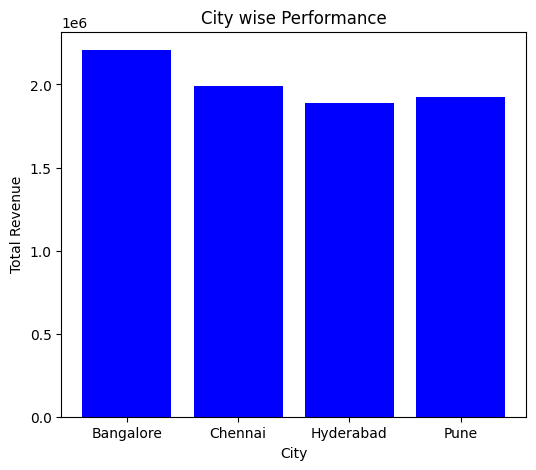

In [187]:
# Plot the graph
plt.figure(figsize=(6,5))
plt.bar(city_wise_performance['city'],city_wise_performance['total_revenue'],color='blue')
plt.title("City wise Performance")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()


In [188]:
#Cuisine-wise Performance
cuisine_wise_performance=final_df.groupby('cuisine').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum')
).reset_index()

cuisine_wise_performance.sort_values(by='total_revenue',ascending=False)

,cuisine,total_orders,total_revenue
3,Mexican,2581,2085503.09
2,Italian,2532,2024203.80
1,Indian,2469,1971412.58
0,Chinese,2418,1930504.65


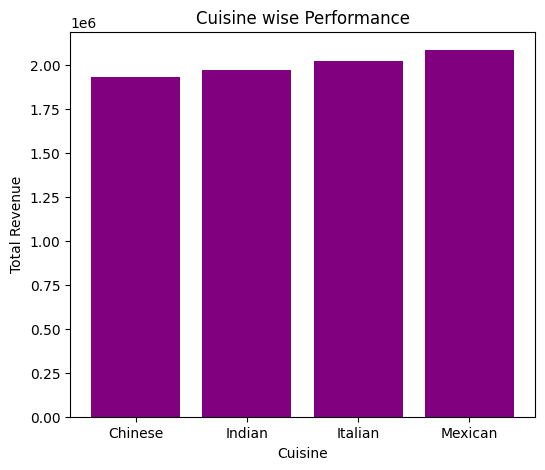

In [189]:
# Plot the graph
plt.figure(figsize=(6,5))
plt.bar(cuisine_wise_performance['cuisine'],cuisine_wise_performance['total_revenue'],color='purple')
plt.title("Cuisine wise Performance")
plt.xlabel("Cuisine")
plt.ylabel("Total Revenue")
plt.show()


To complete this tasks I grouped the data by the city and cuisine to calculate the total number of orders and the total revneue generated

In [190]:
# Membership impact (Gold vs Regular)
membership_impact=final_df.groupby('membership').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum')
).reset_index()

membership_impact.sort_values(by='total_revenue',ascending=False)

,membership,total_orders,total_revenue
1,Regular,5013,4036259.23
0,Gold,4987,3975364.89


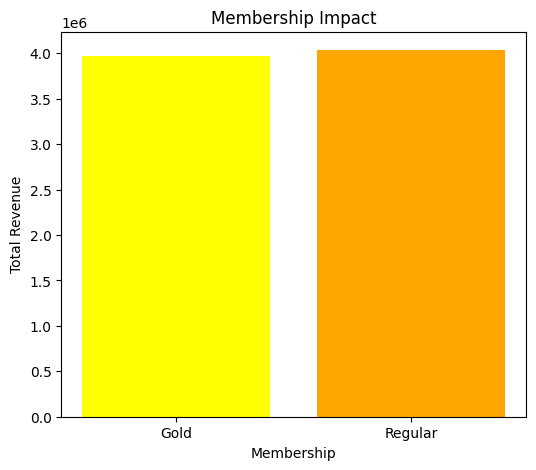

In [191]:
# Plot the graph
plt.figure(figsize=(6,5))
plt.bar(membership_impact['membership'],membership_impact['total_revenue'],color=['yellow','orange'])
plt.title("Membership Impact")
plt.xlabel("Membership")
plt.ylabel("Total Revenue")
plt.show()


Here to understand the membership Impact , I grouped the data by membership column and generate the total revenue . Also plot the graph for better understanding

In [192]:
# Revenue distribution and seasonality
monthly_revenue=final_df.groupby('month')['total_amount'].sum().reset_index(name="Montly Revnue")
monthly_revenue

,month,Montly Revnue
0,2023-01,645818.76
1,2023-02,630867.40
2,2023-03,716738.98
3,2023-04,666097.18
4,2023-05,668428.61
5,2023-06,610822.93
6,2023-07,688559.45
7,2023-08,694987.58
8,2023-09,653838.07
9,2023-10,699187.73


<Figure size 800x600 with 0 Axes>

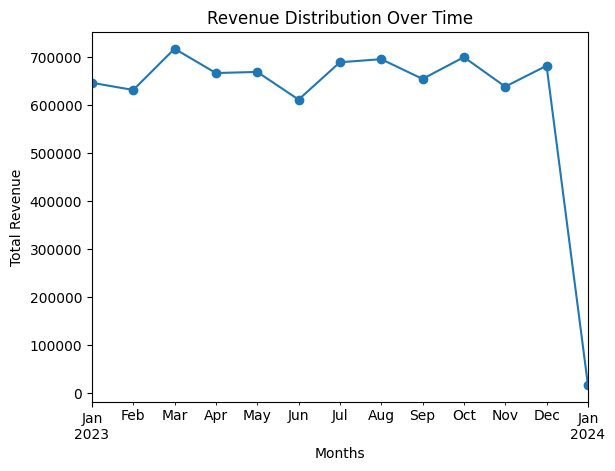

In [193]:
#PLot the graph
plt.figure(figsize=(8,6))
monthly_revenue.plot(
    kind='line',
    x='month',
    y='Montly Revnue',
    marker='o',
    legend=False
)
plt.title("Revenue Distribution Over Time")
plt.xlabel("Months")
plt.ylabel("Total Revenue")
plt.show()
    

In these task, I analyzed how revenue is distributed across months. By grouping the data by month I calcuated the total revenue generated in month.

Hackathon Questions

In [194]:
# Which city has the highest total revenue (total_amount) from Gold members?  
city_revenue_gold=(final_df[final_df['membership']=='Gold'].groupby('city')['total_amount'].sum()
                   .reset_index(name='total_revenue'))
city_revenue_gold.sort_values(by='total_revenue',ascending=False).head(1)

,city,total_revenue
1,Chennai,1080909.79


In [195]:
# Which cuisine has the highest average order value across all orders?
final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False).head(1)

cuisine
Mexican    808.021344
Name: total_amount, dtype: float64

In [196]:
# How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?
customer_analysis=final_df.groupby('user_id')['total_amount'].sum().reset_index(name='Total Amount Spend')

customer_analysis_filter=customer_analysis[customer_analysis['Total Amount Spend']>1000]
customer_analysis_filter['user_id'].nunique()

2544

In [197]:
# Which restaurant rating range generated the highest total revenue?
#First we will create a rating range 

def range(rating):
    if 3.0<=rating<=3.5:
        return '3.0-3.5'
    elif 3.6<=rating<=4.0:
        return '3.6-4.0'
    elif 4.1<=rating<=4.5:
        return '4.1-4.5'
    else:
        return '4.6-5.0'



In [198]:
final_df['rating_range']=final_df['rating'].apply(range)

In [199]:
rating_analysis=(final_df.groupby('rating_range')['total_amount'].sum()
                 .reset_index(name='total_revenue').sort_values(by='total_revenue',ascending=False)
                )
rating_analysis


,rating_range,total_revenue
3,4.6-5.0,2197030.75
0,3.0-3.5,2136772.70
2,4.1-4.5,1960326.26
1,3.6-4.0,1717494.41


In [200]:
# Among Gold members, which city has the highest average order value?  
city_aov_gold=(final_df[final_df['membership']=='Gold'].groupby('city')['total_amount'].mean()
                   .reset_index(name='average_order_value'))
city_aov_gold.sort_values(by='average_order_value',ascending=False).head(1)

,city,average_order_value
1,Chennai,808.45908


In [201]:
# Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
cuisine_analysis=final_df.groupby('cuisine').agg(
    total_restaurant_count=('restaurant_id','nunique'),
    total_revenue=('total_amount','sum')
).reset_index()
cuisine_analysis.sort_values(by='total_restaurant_count')

,cuisine,total_restaurant_count,total_revenue
0,Chinese,120,1930504.65
1,Indian,126,1971412.58
2,Italian,126,2024203.80
3,Mexican,128,2085503.09


In [202]:
# What percentage of total orders were placed by Gold members? (Rounded to nearest integer)
total_order=final_df['order_id'].nunique()

total_gold_order=final_df[final_df['membership']=='Gold']['order_id'].nunique()

pct=round((total_gold_order/total_order)*100)

print(f"percentage of total orders were placed by Gold members : {pct}%")



percentage of total orders were placed by Gold members : 50%


In [220]:
# Which restaurant has the highest average order value but less than 20 total orders?

restaurant_analysis=final_df.groupby('restaurant_name').agg(
    total_order=('order_id','count'),
    aov=('total_amount','mean')
    ).reset_index()

restaurant_analysis_filter=restaurant_analysis[restaurant_analysis['total_order']<20]
restaurant_analysis_filter.sort_values(by='aov',ascending=False).head(50)

,restaurant_name,total_order,aov
173,Hotel Dhaba Multicuisine,13,1040.222308
354,Sri Mess Punjabi,12,1029.180833
236,Ruchi Biryani Punjabi,16,1002.140625
343,Sri Delights Pure Veg,18,989.467222
88,Classic Kitchen Family Restaurant,19,973.167895
172,Hotel Dhaba Chinese,18,973.125556
28,Amma Mess Pure Veg,18,965.299444
161,Hotel Biryani Pure Veg,13,964.577692
41,Annapurna Curry House Multicuisine,17,954.512353
405,Taste of Restaurant Family Restaurant,10,948.220000


Index(['order_id', 'order_date', 'total_amount', 'user_id', 'city',
       'membership', 'restaurant_id', 'restaurant_name', 'cuisine', 'rating',
       'month', 'rating_range'],
      dtype='object')

In [218]:
restaurant_analysis_filter[restaurant_analysis_filter['restaurant_name']=='Ruchi Foods Chinese']

,restaurant_name,total_order,aov
254,Ruchi Foods Chinese,19,686.603158


In [222]:
#Which combination contribute to the highest revenue
combination_revenue=(final_df.groupby(['membership','cuisine'])['total_amount'].sum()
                     .reset_index(name='total_revenue'))
combination_revenue.sort_values(by='total_revenue',ascending=False)

,membership,cuisine,total_revenue
7,Regular,Mexican,1072943.30
6,Regular,Italian,1018424.75
3,Gold,Mexican,1012559.79
2,Gold,Italian,1005779.05
5,Regular,Indian,992100.27
1,Gold,Indian,979312.31
0,Gold,Chinese,977713.74
4,Regular,Chinese,952790.91


In [223]:
# During which quarter of the year is the total revenue highest?
#we will extract the quator from the order date
final_df['quarter_range']=final_df['order_date'].dt.quarter

<Axes: xlabel='quarter_range'>

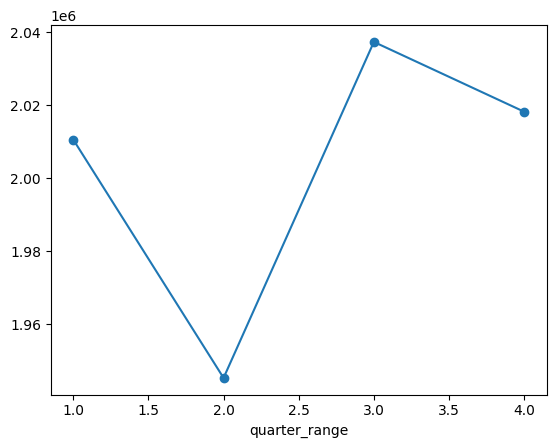

In [227]:
quarter_analysis=(final_df.groupby('quarter_range')['total_amount'].sum()
                  .reset_index(name='total_revenue'))

quarter_analysis.plot(
    kind='line',
    x='quarter_range',
    y='total_revenue',
    marker='o',
    legend=False
)

In [229]:
# How many total order were placed by gold membership
total_gold_order

4987

In [231]:
# What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
hyd_revenue=round(final_df[final_df['city']=='Hyderabad']['total_amount'].sum())
hyd_revenue

1889367

In [232]:
# How many distinct users placed at least one order?
final_df['user_id'].nunique()

2883

In [239]:
# What is the average order value (rounded to 2 decimals) for Gold members?
gold_aov=final_df[final_df['membership']=='Gold']['total_amount'].mean()
print(f"Average ofer value for Gold members : {round(gold_aov,2)}")

Average ofer value for Gold members : 797.15


In [238]:
# How many orders were placed for restaurants with rating ≥ 4.5?
total_order=final_df[final_df['rating']>=4.5]['order_id'].nunique()
print(f"Total orders placed for restaurants with rating >=4.5 are : {total_order}")

Total orders placed for restaurants with rating >=4.5 are : 3374


In [244]:
# How many orders were placed in the top revenue city among Gold members only?
gold_membership_df=final_df[final_df['membership']=='Gold']

city_revenue=(gold_membership_df.groupby('city')['total_amount'].sum()
                  .reset_index(name='total_revenue')
                  .sort_values(by='total_revenue',ascending=False)
                 )
top_revenue_city=city_revenue.iloc[0]['city']
top_revenue_city

'Chennai'

In [246]:
#To find order in top city
top_city_order=gold_membership_df[gold_membership_df['city']==top_revenue_city]['order_id'].nunique()
top_city_order

1337

#Insights


- The highest number of orders was observed in March 2023, indicating increased customer activity during that period.  
- Bangalore generated the highest total revenue among all cities, followed by Chennai and Pune. 
- Regular members placed slightly more orders and contributed marginally higher total revenue compared to Gold members.  
- Certain cuisines contributed more to overall revenue, showing clear customer preference for specific food types.  
- Revenue trends vary by month ,showing seasonal patterns
